In [3]:
import sys
import pathlib


sys.path.append("../")


In [6]:
import src.BraTS_Segmentation.custom_datagen

In [ ]:
import os
import numpy as np
import pandas as pd
from custom_datagen import imageLoader

# import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random
import segmentation_models_3D as sm
from keras.models import load_model
from keras.metrics import MeanIoU
import tensorflow as tf

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'BraTS2020_DataSet/BraTS2020_numpy/data_split_128/train/images/'

In [ ]:
train_img_dir = "BraTS2020_DataSet/BraTS2020_numpy/data_split_128/train/images/"
train_mask_dir = "BraTS2020_DataSet/BraTS2020_numpy/data_split_128/train/masks/"

In [ ]:
img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

In [ ]:
num_images = len(os.listdir(train_img_dir))

num_images

258

In [ ]:
img_num = random.randint(0, num_images - 1)
test_img = np.load(train_img_dir + img_list[img_num])
test_mask = np.load(train_mask_dir + msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

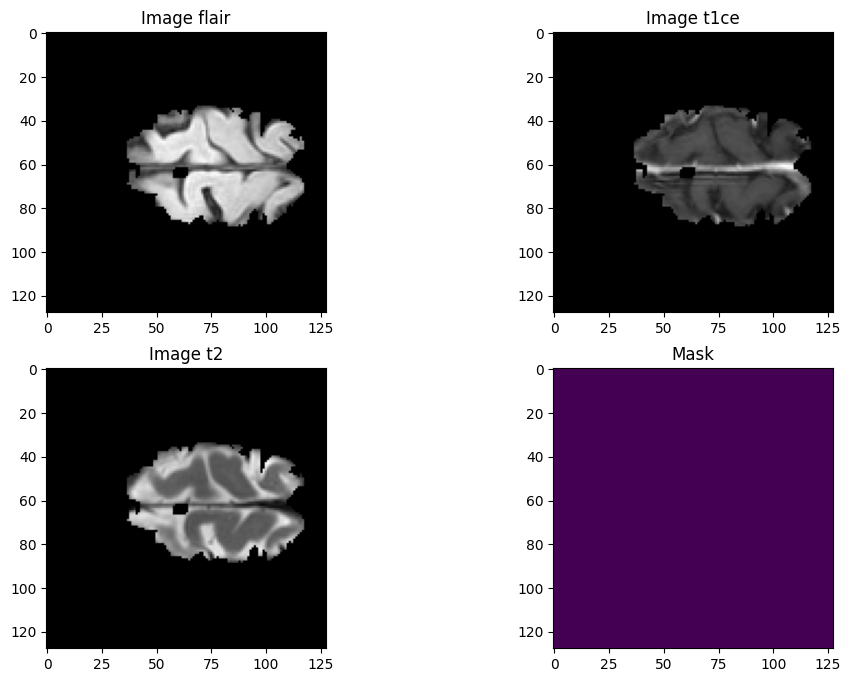

In [ ]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:, :, n_slice, 0], cmap="gray")
plt.title("Image flair")
plt.subplot(222)
plt.imshow(test_img[:, :, n_slice, 1], cmap="gray")
plt.title("Image t1ce")
plt.subplot(223)
plt.imshow(test_img[:, :, n_slice, 2], cmap="gray")
plt.title("Image t2")
plt.subplot(224)
plt.imshow(test_mask[:, :, n_slice])
plt.title("Mask")
plt.show()

In [ ]:
#############################################################
# Optional step of finding the distribution of each class and calculating appropriate weights
# Alternatively you can just assign equal weights and see how well the model performs: 0.25, 0.25, 0.25, 0.25

import pandas as pd

columns = ["0", "1", "2", "3"]
df = pd.DataFrame(columns=columns)
train_mask_list = sorted(
    glob.glob("BraTS2020_DataSet/BraTS2020_numpy/data_split_128/train/masks/*.npy")
)
for img in range(len(train_mask_list)):
    print(img)
    temp_image = np.load(train_mask_list[img])
    temp_image = np.argmax(temp_image, axis=3)
    val, counts = np.unique(temp_image, return_counts=True)
    zipped = zip(columns, counts)
    conts_dict = dict(zipped)

    df = df.append(conts_dict, ignore_index=True)


label_0 = df["0"].sum()
label_1 = df["1"].sum()
label_2 = df["1"].sum()
label_3 = df["3"].sum()

total_labels = label_0 + label_1 + label_2 + label_3
n_classes = 4

# Class weights claculation: n_samples / (n_classes * n_samples_for_class)
wt0 = round((total_labels / (n_classes * label_0)), 2)  # round to 2 decimals
wt1 = round((total_labels / (n_classes * label_1)), 2)
wt2 = round((total_labels / (n_classes * label_2)), 2)
wt3 = round((total_labels / (n_classes * label_3)), 2)

# Weights are: 0.26, 22.53, 22.53, 26.21
# wt0, wt1, wt2, wt3 = 0.26, 22.53, 22.53, 26.21
# These weihts can be used for Dice loss

0


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


1


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


2


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


3


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


4


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


5


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


6


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


7


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


8


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


9


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


10


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


11


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


12


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


13


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


14


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


15


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


16


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


17


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


18


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


19


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


20


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


21


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


22


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


23


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


24


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


25


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


26


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


27


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


28


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


29


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


30


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


31


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


32


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


33


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


34


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


35


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


36


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


37


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


38


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


39


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


40


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


41


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


42


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


43


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


44


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


45


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


46


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


47


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


48


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


49


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


50


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


51


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


52


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


53


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


54


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


55


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


56


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


57


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


58


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


59


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


60


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


61


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


62


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


63


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


64


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


65


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


66


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


67


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


68


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


69


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


70


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


71


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


72


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


73


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


74


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


75


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


76


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


77


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


78


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


79


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


80


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


81


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


82


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


83


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


84


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


85


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


86


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


87


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


88


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


89


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


90


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


91


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


92


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


93


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


94


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


95


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


96


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


97


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


98


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


99


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


100


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


101


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


102


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


103


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


104


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


105


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


106


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


107


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


108


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


109


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


110


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


111


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


112


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


113


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


114


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


115


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


116


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


117


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


118


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


119


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


120


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


121


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


122


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


123


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


124


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


125


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


126


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


127


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


128


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


129


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


130


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


131


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


132


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


133


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


134


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


135


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


136


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


137


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


138


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


139


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


140


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


141


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


142


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


143


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


144


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


145


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


146


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


147


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


148


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


149


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


150


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


151


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


152


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


153


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


154


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


155


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


156


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


157


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


158


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


159


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


160


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


161


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


162


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


163


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


164


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


165


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


166


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


167


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


168


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


169


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


170


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


171


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


172


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


173


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


174


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


175


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


176


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


177


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


178


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


179


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


180


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


181


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


182


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


183


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


184


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


185


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


186


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


187


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


188


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


189


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


190


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


191


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


192


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


193


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


194


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


195


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


196


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


197


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


198


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


199


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


200


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


201


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


202


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


203


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


204


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


205


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


206


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


207


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


208


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


209


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


210


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


211


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


212


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


213


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


214


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


215


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


216


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


217


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


218


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


219


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


220


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


221


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


222


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


223


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


224


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


225


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


226


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


227


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


228


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


229


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


230


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


231


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


232


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


233


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


234


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


235


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


236


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


237


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


238


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


239


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


240


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


241


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


242


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


243


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


244


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


245


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


246


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


247


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


248


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


249


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


250


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


251


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


252


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


253


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


254


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


255


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


256


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


257


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_9548\749903367.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)


In [ ]:
# Define the image generators for training and validation

train_img_dir = "BraTS2020_DataSet/BraTS2020_numpy/data_split_128/train/images/"
train_mask_dir = "BraTS2020_DataSet/BraTS2020_numpy/data_split_128/train/masks/"

val_img_dir = "BraTS2020_DataSet/BraTS2020_numpy/data_split_128/val/images/"
val_mask_dir = "BraTS2020_DataSet/BraTS2020_numpy/data_split_128/val/masks/"

In [ ]:
train_img_list = os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list = os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

In [ ]:
batch_size = 2

train_img_datagen = imageLoader(
    train_img_dir, train_img_list, train_mask_dir, train_mask_list, batch_size
)

val_img_datagen = imageLoader(
    val_img_dir, val_img_list, val_mask_dir, val_mask_list, batch_size
)

In [ ]:
# Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

In [ ]:
img_num = random.randint(0, img.shape[0] - 1)
test_img = img[img_num]
test_mask = msk[img_num]
test_mask = np.argmax(test_mask, axis=3)

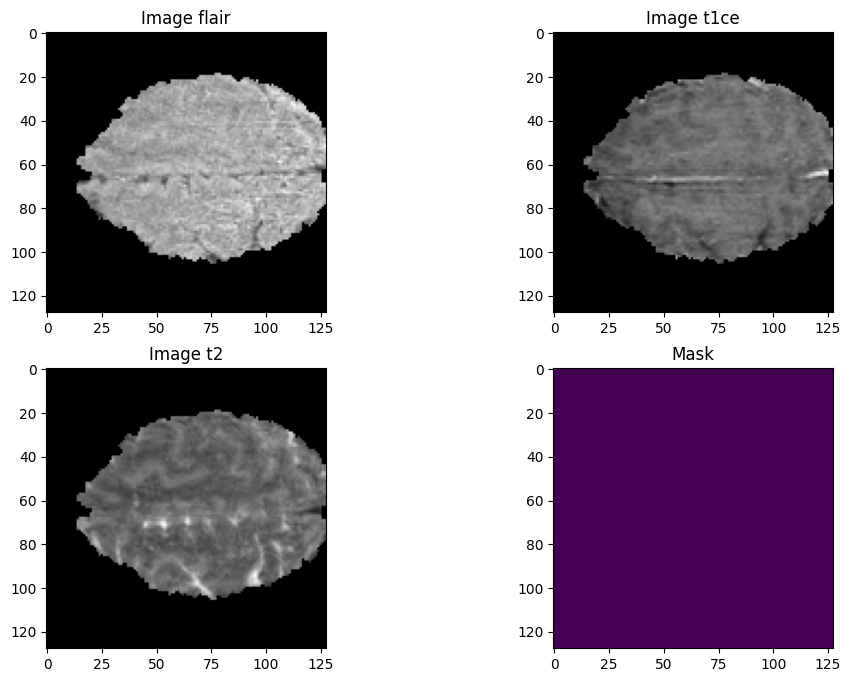

In [ ]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:, :, n_slice, 0], cmap="gray")
plt.title("Image flair")
plt.subplot(222)
plt.imshow(test_img[:, :, n_slice, 1], cmap="gray")
plt.title("Image t1ce")
plt.subplot(223)
plt.imshow(test_img[:, :, n_slice, 2], cmap="gray")
plt.title("Image t2")
plt.subplot(224)
plt.imshow(test_mask[:, :, n_slice])
plt.title("Mask")
plt.show()

In [ ]:
###########################################################################
# Define loss, metrics and optimizer to be used for training

wt0, wt1, wt2, wt3 = 0.25, 0.25, 0.25, 0.25

# import segmentation_models_3D as sm

dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ["accuracy", sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001


# optim = keras.optimizers.Adam(LR) ########## Deprecated

optim = tf.keras.optimizers.Adam(LR)

In [ ]:
# Fit the model

steps_per_epoch = len(train_img_list) // batch_size
val_steps_per_epoch = len(val_img_list) // batch_size


from simple_3d_unet import simple_unet_model

model = simple_unet_model(
    IMG_HEIGHT=128, IMG_WIDTH=128, IMG_DEPTH=128, IMG_CHANNELS=3, num_classes=4
)

model.compile(optimizer=optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1312        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 16)                                                        

In [ ]:
history = model.fit(
    train_img_datagen,
    steps_per_epoch=steps_per_epoch,
    epochs=1,
    verbose=1,
    validation_data=val_img_datagen,
    validation_steps=val_steps_per_epoch,
)


os.makedirs("./artifacts/models", exist_ok=True)

model.save("./artifacts/models/brats_3d.hdf5")

: 

: 

In [ ]:
# plot the training and validation IoU and loss at each epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "y", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "y", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#from keras.models import load_model

#Load model for prediction or continue training

#For continuing training....
#The following gives an error: Unknown loss function: dice_loss_plus_1focal_loss
#This is because the model does not save loss function and metrics. So to compile and 
#continue training we need to provide these as custom_objects.
my_model = load_model('saved_models/brats_3d_100epochs_simple_

In [ ]:
# So let us add the loss as custom object... but the following throws another error...
# Unknown metric function: iou_score
my_model = load_model(
    "saved_models/brats_3d_100epochs_simple_unet_weighted_dice.hdf5",
    custom_objects={"dice_loss_plus_1focal_loss": total_loss},
)

In [ ]:
# Now, let us add the iou_score function we used during our initial training
my_model = load_model(
    "saved_models/brats_3d_100epochs_simple_unet_weighted_dice.hdf5",
    custom_objects={
        "dice_loss_plus_1focal_loss": total_loss,
        "iou_score": sm.metrics.IOUScore(threshold=0.5),
    },
)

In [ ]:
# Now all set to continue the training process.
history2 = my_model.fit(
    train_img_datagen,
    steps_per_epoch=steps_per_epoch,
    epochs=1,
    verbose=1,
    validation_data=val_img_datagen,
    validation_steps=val_steps_per_epoch,
)